In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read the data from the csv file
pd.read_csv('practice.csv',header=None).T.to_csv('output.csv',header=False, index=False)
df= pd.read_csv('output.csv')




In [17]:
# Show first five rows
df.rename(columns = {'Brands':'Year'}, inplace = True)
df.head()


,Year,Apple,Mi,Samsung,Nokia,Moto,Vivo,Oppo
0,2016,79918,3315550,9394877,9957350,8811559,3216518,4292105
1,2017,92956,1409596,6224008,10681674,8960636,1199904,4892096
2,2018,36311,9277163,2676267,8963409,9256990,6631994,5552392
3,2019,98601,1660474,10854249,9150408,5709109,7478769,7785292
4,2020,70320,9992642,9698714,8832315,9261169,6015910,2739808


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     8 non-null      int64
 1   Apple    8 non-null      int64
 2   Mi       8 non-null      int64
 3   Samsung  8 non-null      int64
 4   Nokia    8 non-null      int64
 5   Moto     8 non-null      int64
 6   Vivo     8 non-null      int64
 7   Oppo     8 non-null      int64
dtypes: int64(8)
memory usage: 644.0 bytes


In [19]:
df.describe()

,Year,Apple,Mi,Samsung,Nokia,Moto,Vivo,Oppo
count,8.00000,8.00000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,2019.50000,74925.00000,5.144246e+06,7.831158e+06,8.742564e+06,7.044288e+06,5.732253e+06,5.756764e+06
std,2.44949,21661.15239,3.512748e+06,3.080156e+06,1.729444e+06,3.648907e+06,2.989154e+06,1.976494e+06
min,2016.00000,36311.00000,1.409596e+06,2.676267e+06,5.021397e+06,1.095159e+06,1.199904e+06,2.739808e+06
25%,2017.75000,65555.25000,2.824200e+06,6.068443e+06,8.566030e+06,4.834232e+06,4.019063e+06,4.742098e+06
50%,2019.50000,78968.50000,3.576648e+06,7.924650e+06,9.056908e+06,8.886098e+06,5.934359e+06,5.388252e+06
75%,2021.25000,92249.50000,8.655808e+06,9.987598e+06,9.664427e+06,9.258035e+06,6.843688e+06,6.914671e+06
max,2023.00000,98601.00000,9.992642e+06,1.174498e+07,1.068167e+07,1.105008e+07,1.117554e+07,8.943846e+06


In [20]:
df.isnull().sum()

Year       0
Apple      0
Mi         0
Samsung    0
Nokia      0
Moto       0
Vivo       0
Oppo       0
dtype: int64

<Axes: xlabel='Year', ylabel='Vivo'>

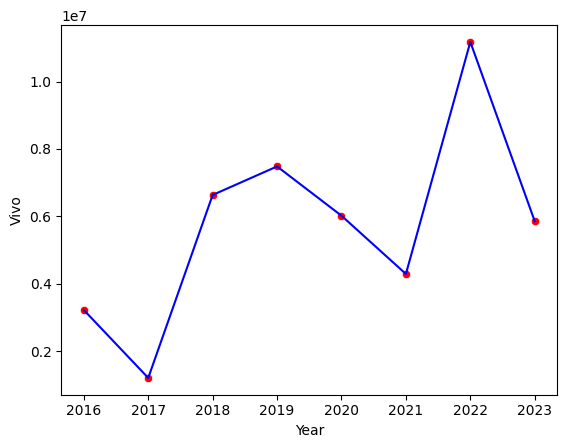

In [21]:
sns.lineplot(df,x = 'Year', y= 'Vivo',color = 'blue')
sns.scatterplot(df,x = 'Year', y= 'Vivo',color = 'red')

In [22]:
# Initialize Features
X = df.drop(['Vivo', 'Year'], axis = 1)

# Initialize Target
y = df['Vivo']

# Create a model
lr = LinearRegression()

# Fit the model
lr.fit(X, y)


LinearRegression()

In [23]:

# make predictions
pred = lr.predict(X)


In [24]:
# Print intercept
print('Intercept:', lr.intercept_)

Intercept: -12268830.001506053


In [25]:
# Initialize Coefficient
coeff_df = pd.DataFrame(lr.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Apple,12.765787
Mi,0.673498
Samsung,0.489161
Nokia,-0.682422
Moto,0.753293
Oppo,1.808130


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred)))
print('R2:', np.sqrt(metrics.r2_score(y, pred)))

Mean Absolute Error: 34347.187853160314
Mean Squared Error: 1760453031.1284769
Root Mean Squared Error: 41957.752932306525
R2: 0.9998874062822416


<Axes: xlabel='Year', ylabel='Apple'>

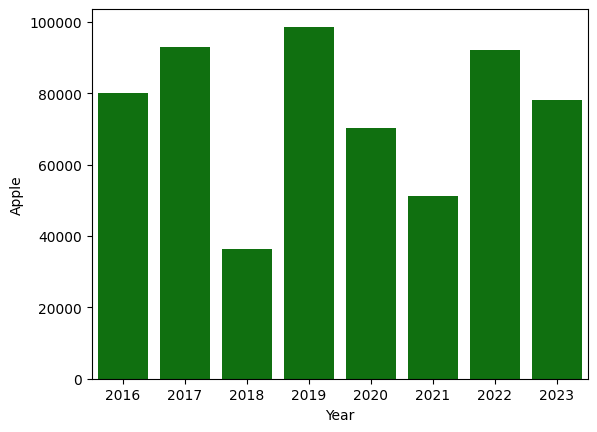

In [27]:
sns.barplot(df,x = 'Year', y= 'Apple',color = 'green')
# sns.displot(df,x = 'Year', y= '2016',color = 'green')

# visualizing the data

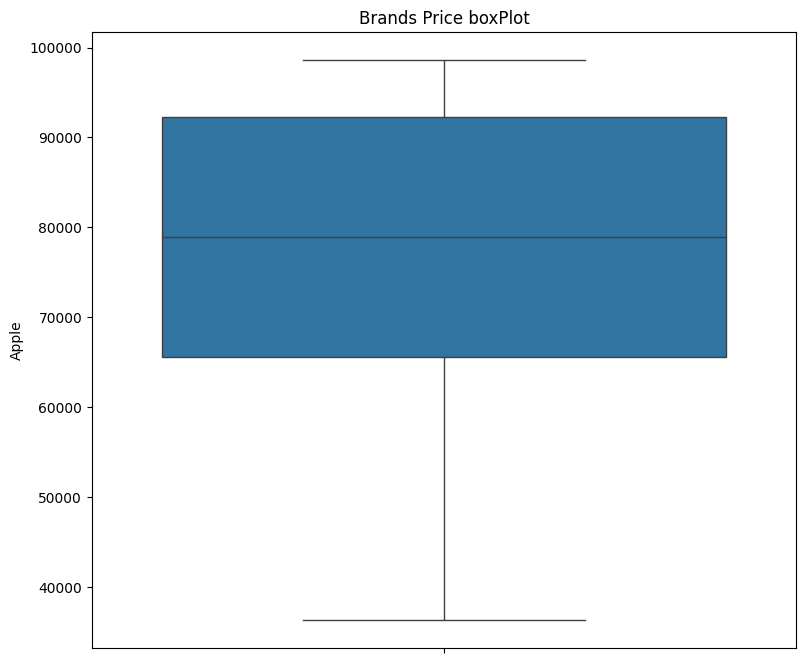

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Brands Price boxPlot')
sns.boxplot(df.Apple)

plt.show()